<a href="https://colab.research.google.com/github/Lunalykaya/ML_portfolio_bookcamp/blob/main/%D0%9C%D0%9E_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%BE%D0%BB%D0%B8%D0%BE_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82_%D0%9B%D0%95%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries & Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('CreditScoring.csv')

## EDA & Data Preporation

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [6]:
df.columns = df.columns.str.lower()

Мы видим, что датафрейм содержит следующие столбцы:
* status — удалось ли клиенту погасить кредит (1) или нет (2);
* seniority — стаж работы в годах;
* home — тип домовладения: аренда (1), владение (2) и другие;
* time — планируемый срок предоставления кредита (в месяцах);
* age — возраст клиента;
* marital [status] — холост (1), женат (2) и др.;
* records — есть ли у клиента какие-либо предыдущие записи: нет (1), да (2)
(из описания набора данных неясно, о каких записях здесь идет речь. Учитывая суть проекта‚ можно предположить, что речь о записях в базе данных
банка);
* job — тип работы: полный рабочий день (1), неполный рабочий день (2)
и другие;
* expenses — сколько клиент тратит в месяц;
* income — сколько клиент зарабатывает в месяц;
* assets — общая стоимость всех активов клиента;
* debt — сумма кредитной задолженности;
* amount — запрашиваемая сумма кредита;
* price — цена товара, который клиент хочет приобрести

In [7]:
df[['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']].describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
df[['income']].max()

,0
income,99999999


In [9]:
df[df['income']==99999999]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,2,0,0,48,37,1,1,0,35,99999999,99999999,99999999,1500,1850
393,2,1,2,36,52,2,2,3,60,99999999,100000,20000,1500,2340
803,1,6,5,24,25,1,1,1,35,99999999,5000,0,850,1480
1306,1,12,2,36,41,2,1,3,60,99999999,10000,0,1000,2100
1420,2,0,2,60,36,2,2,3,75,99999999,6000,0,1650,1861
1436,1,5,1,24,29,2,1,3,45,99999999,0,0,800,1197
1455,2,2,2,36,19,1,2,3,35,99999999,9000,0,500,1100
1472,1,15,2,60,40,2,2,3,75,99999999,16000,0,1150,1850
1534,2,1,2,60,39,2,1,3,60,99999999,6000,3000,850,1104
1543,2,10,2,36,43,2,1,3,60,99999999,4500,0,1000,1905


In [10]:
df[['income', 'assets', 'debt']] = df[['income', 'assets', 'debt']].replace(99999999, 0)

In [11]:
df[['income']].max()

,0
income,959


In [12]:
df.status.value_counts()

,count
status,
1,3200
2,1254
0,1


In [13]:
df = df[df['status'] != 0]

In [14]:
df.status.value_counts()

,count
status,
1,3200
2,1254


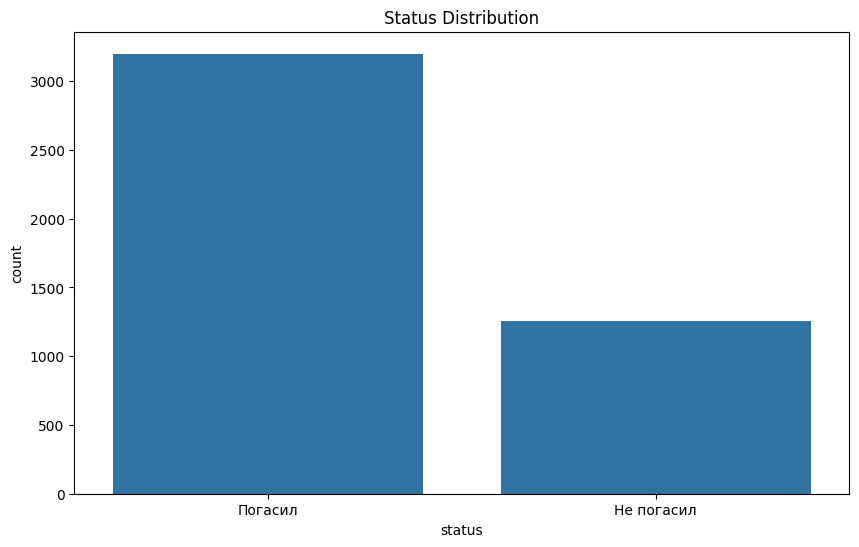

In [15]:
status_labels = {1: 'Погасил', 2: 'Не погасил'}
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status')
plt.title('Status Distribution')
plt.xticks([0, 1], [status_labels[1], status_labels[2]])
plt.show()

### Data Splitting

In [16]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [18]:
print('train size:', len(df_train))
print('val size:', len(df_val))
print('test size:', len(df_test))

train size: 2672
val size: 891
test size: 891


In [19]:
y_train = (df_train['status'] == 2).values  # 1 — не погасил, 0 — погасил
y_val = (df_val['status'] == 2).values

In [20]:
X_train = df_train.drop(columns='status')
X_val = df_val.drop(columns='status')

## Random Forest

In [21]:
clf_rf = RandomForestClassifier()

In [22]:
clf_rf

RandomForestClassifier()

In [70]:
parametrs = {'n_estimators': (1, 200), 'max_depth': (3, 100), 'min_samples_leaf': (1, 100), 'class_weight': [{0: 1, 1: 2.55}]}

In [71]:
grid_search_cv_clf_forest = GridSearchCV(clf_rf, parametrs, cv=5)

In [72]:
grid_search_cv_clf_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 2.55}],
                         'max_depth': (3, 100), 'min_samples_leaf': (1, 100),
                         'n_estimators': (1, 200)})

In [73]:
grid_search_cv_clf_forest.best_params_

{'class_weight': {0: 1, 1: 2.55},
 'max_depth': 100,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [74]:
y_pred = grid_search_cv_clf_forest.predict(X_val)

In [76]:
clf_rf = RandomForestClassifier(class_weight={0: 1, 1: 2.55})

In [77]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2.55})

In [78]:
y_pred = clf_rf.predict(X_val)

In [79]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.94      0.86       643
        True       0.71      0.41      0.52       248

    accuracy                           0.79       891
   macro avg       0.76      0.67      0.69       891
weighted avg       0.78      0.79      0.77       891



In [50]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

In [51]:
roc_auc_score(y_val, y_pred)

np.float64(0.6932912757738425)

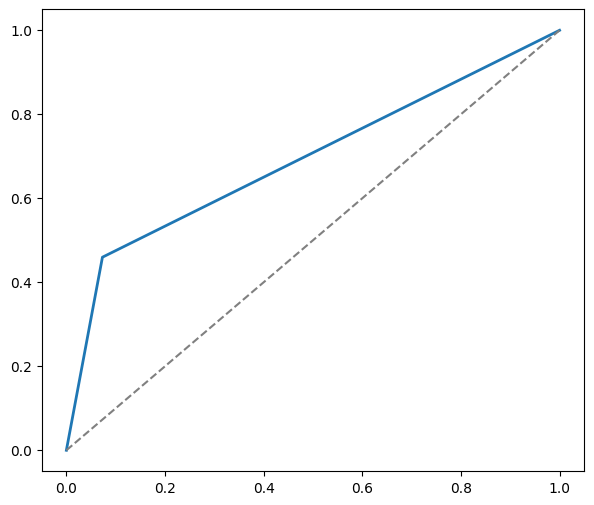

In [52]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайная модель')